# Prediction of direction of Bitcoin based on sentiment data
## Bilel MEZRANI - William SCHTRAOUSS - Data Challenge APST1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
import missingno
import sklearn

#### Importation des données

In [2]:
file_path= "/Users/Bilel945/Downloads"
di = pd.read_csv(file_path + "/input_training_IrTAw7w.csv").iloc[:,1:]
do = pd.read_csv(file_path + "/output_training_F2dZW38.csv").iloc[:,1:]
dt = pd.read_csv(file_path + "/input_test_PkjtqdQ.csv").iloc[:,1:]

## EDA : Exploration des données 

In [3]:
di.head(5)

,X1,X2,X3,X4,X5,I1_lag0,I1_lag1,I1_lag2,I1_lag3,I1_lag4,...,I10_lag38,I10_lag39,I10_lag40,I10_lag41,I10_lag42,I10_lag43,I10_lag44,I10_lag45,I10_lag46,I10_lag47
0,0.460020,0.620360,-0.972192,2.745197,4.177783,2.325865,2.060138,0.071162,2.360597,-0.611526,...,-0.342912,-0.194165,0.122331,0.028682,-0.093626,-0.559840,0.562584,-0.557868,1.424906,-0.016294
1,-0.347872,-2.199925,-0.222026,3.741888,8.608291,-4.091293,-3.502499,-1.463631,0.383153,-3.669962,...,1.261341,-0.082428,-1.035813,-0.249607,-0.971215,-0.058408,1.460632,-0.653394,-1.743487,4.065305
2,-2.152963,-0.432461,1.619057,-0.003912,3.870262,-0.598858,-0.412391,-0.765354,-0.998152,-0.938755,...,2.245204,3.002347,2.674186,2.656251,1.062974,-0.484619,-0.044594,1.579731,0.962836,1.146983
3,-1.827669,-1.881770,-4.214322,0.178225,0.992362,0.383757,2.512478,-0.383434,-0.208506,-1.104289,...,1.383203,-1.338892,0.298076,1.808275,2.837975,2.054112,0.741138,1.701911,0.110082,0.114980
4,0.748761,1.799939,1.561006,5.204120,2.161637,-1.275226,-1.544131,-1.802590,-1.128526,-0.469835,...,-0.477313,0.742923,-0.273225,1.311015,0.744330,2.914322,1.030602,0.480722,-0.492838,1.377958


On a 485 features :

*  **ID** : index
* **X1 to X5** : Valeurs des 5 indicateurs normalisés représentant les variations du prix du Bitcoin sur les dernières 1h, 6h, 12h, 24h et 48h.
* **I_1_lag(k) to I_10_lag(k)**: Valeurs des indicateurs de sentiments I_1 à I_10 pour k $\in [0, 47]$ représentant les valeurs normalisées des indicateurs à chaque heure des dernières 48h

On a par ailleurs 14000 échantillons dans les données d'apprentissage et 5000 dans les données de test.

In [3]:
X = di.to_numpy()
Target = np.argmax(do.to_numpy(), axis = 1)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, make_scorer, log_loss

In [37]:
di.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X1,14000.0,0.004314,0.997622,-3.563752,-0.547221,0.016987,0.581423,3.526828
X2,14000.0,0.063161,2.306310,-8.824882,-1.394678,0.076528,1.581980,9.720552
X3,14000.0,0.097983,3.308750,-11.103423,-2.018939,0.111111,2.262388,13.283810
X4,14000.0,0.313850,4.770469,-16.572351,-3.188673,0.165263,3.779626,17.289142
X5,14000.0,0.546561,6.817509,-19.603209,-4.287123,0.339202,5.014781,24.373931
...,...,...,...,...,...,...,...,...
I10_lag43,14000.0,0.001733,1.664335,-9.715348,-0.833402,-0.140780,0.699462,20.841614
I10_lag44,14000.0,0.002222,1.678618,-10.005765,-0.841939,-0.138062,0.698006,20.520402
I10_lag45,14000.0,0.003779,1.697819,-10.071904,-0.845976,-0.137948,0.706354,20.187682
I10_lag46,14000.0,0.005371,1.722709,-10.369489,-0.847806,-0.138881,0.708265,20.823500


In [38]:
di.corr()

,X1,X2,X3,X4,X5,I1_lag0,I1_lag1,I1_lag2,I1_lag3,I1_lag4,...,I10_lag38,I10_lag39,I10_lag40,I10_lag41,I10_lag42,I10_lag43,I10_lag44,I10_lag45,I10_lag46,I10_lag47
X1,1.000000,0.415281,0.297429,0.241920,0.171764,0.002568,-0.001963,0.005375,0.010240,-0.003028,...,-0.011549,0.000558,-0.006505,-0.008018,-0.002050,0.004915,-0.002886,0.005234,0.003567,-0.014117
X2,0.415281,1.000000,0.694171,0.544259,0.380184,-0.001512,0.000038,0.000085,0.006176,0.006450,...,-0.032018,-0.022895,-0.022034,-0.018337,-0.014137,-0.006720,-0.003434,-0.001640,0.001073,-0.003122
X3,0.297429,0.694171,1.000000,0.749113,0.530711,-0.000630,-0.000064,0.003023,0.007660,0.006205,...,-0.022143,-0.024586,-0.026085,-0.028502,-0.031665,-0.030346,-0.028295,-0.020032,-0.016841,-0.017229
X4,0.241920,0.544259,0.749113,1.000000,0.695964,-0.000898,-0.001857,-0.002698,-0.002950,-0.004516,...,-0.016022,-0.014874,-0.015142,-0.016629,-0.016374,-0.012006,-0.011920,-0.013346,-0.012460,-0.015819
X5,0.171764,0.380184,0.530711,0.695964,1.000000,0.001441,0.003801,0.004470,0.005110,0.002862,...,-0.019548,-0.019628,-0.022341,-0.024242,-0.024854,-0.025045,-0.025158,-0.023850,-0.023014,-0.025441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I10_lag43,0.004915,-0.006720,-0.030346,-0.012006,-0.025045,0.036333,-0.034513,-0.096282,-0.165011,-0.235989,...,0.179002,0.271409,0.358908,0.444803,0.547486,1.000000,0.554901,0.462995,0.389093,0.315937
I10_lag44,-0.002886,-0.003434,-0.028295,-0.011920,-0.025158,0.101867,0.037420,-0.032743,-0.095266,-0.163497,...,0.089311,0.187331,0.279219,0.367378,0.453324,0.554901,1.000000,0.564174,0.474057,0.403518
I10_lag45,0.005234,-0.001640,-0.020032,-0.013346,-0.023850,0.152651,0.103718,0.039358,-0.031325,-0.093312,...,0.029972,0.099550,0.197512,0.289212,0.377302,0.462995,0.564174,1.000000,0.575128,0.488421
I10_lag46,0.003567,0.001073,-0.016841,-0.012460,-0.023014,0.201902,0.154007,0.104943,0.040163,-0.029323,...,-0.047717,0.042199,0.111988,0.211345,0.301033,0.389093,0.474057,0.575128,1.000000,0.587912


### On observe s'il y a des données manquantes

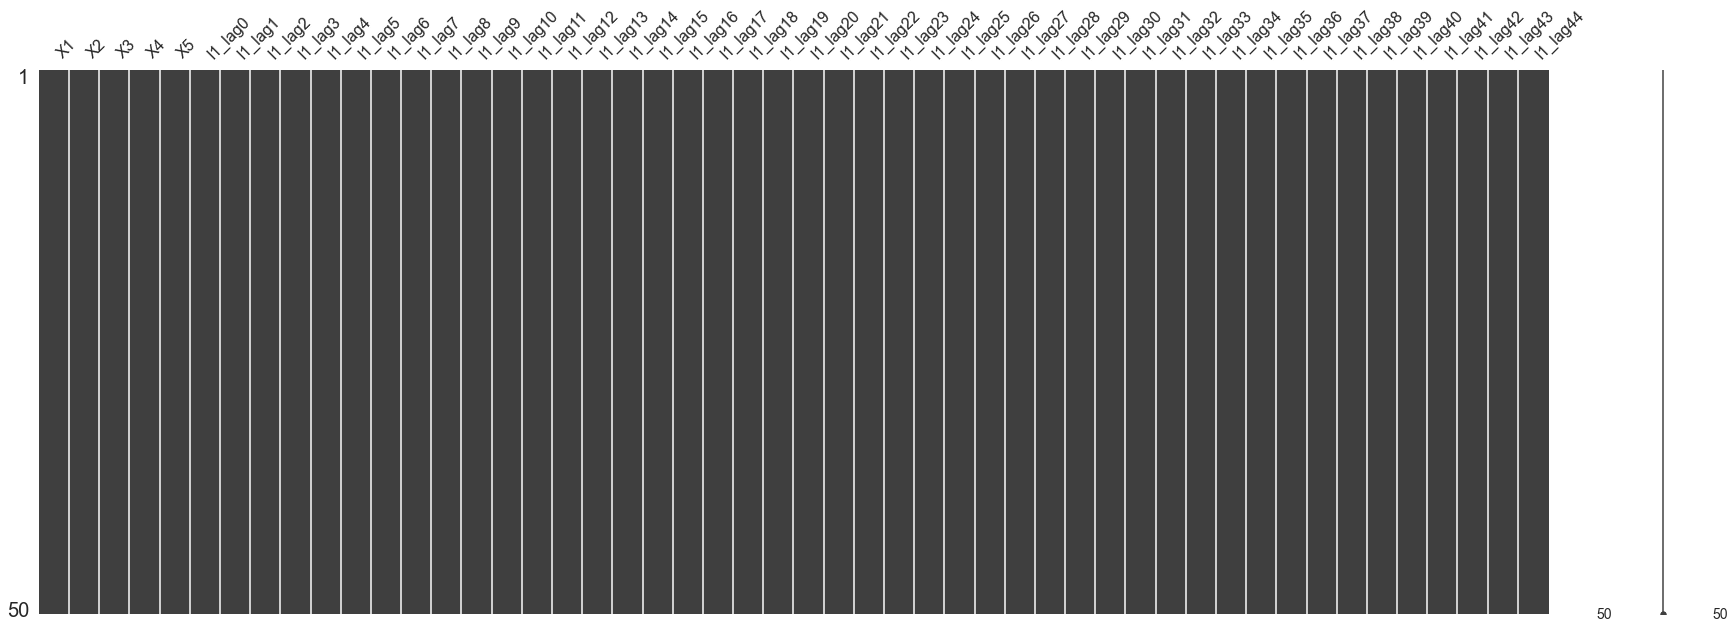

In [8]:
missingno.matrix(di.iloc[:50,:50], figsize = (30,10))

On observe qu'il n'y a pas de données manquantes (représentées par des traits blancs).

### On observe les outliers possibles

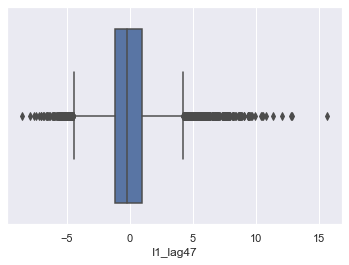

In [9]:
sns.boxplot(x=di['I1_lag47'])

Ici, les outliers doivent être gardés car les caprices du marché et l'actualité doivent être pris en compte.

Il faut préalablement transformer la variable de classe qui est sous la forme "one hot encoding" : on se ramène ainsi à un seul vecteur contenant 0, 1 ou 2

In [ ]:
''''from scipy import stats
import numpy as np
z = np.abs(stats.zscore(technical_features))
print(np.shape(z))

In [ ]:
''''threshold = 3
np.where(z > threshold)

In [ ]:
'technical_features2 = technical_features[(z < 3).all(axis=1)]

In [ ]:
'Target1 = Target[[(z < 3).all(axis=1)]]

# Feature Engineering

On trace l'évolution des corrélations entre les indicateurs et la variation du bitcoin sur la dernière heure, ainsi que les variations qui doivent être prédites.

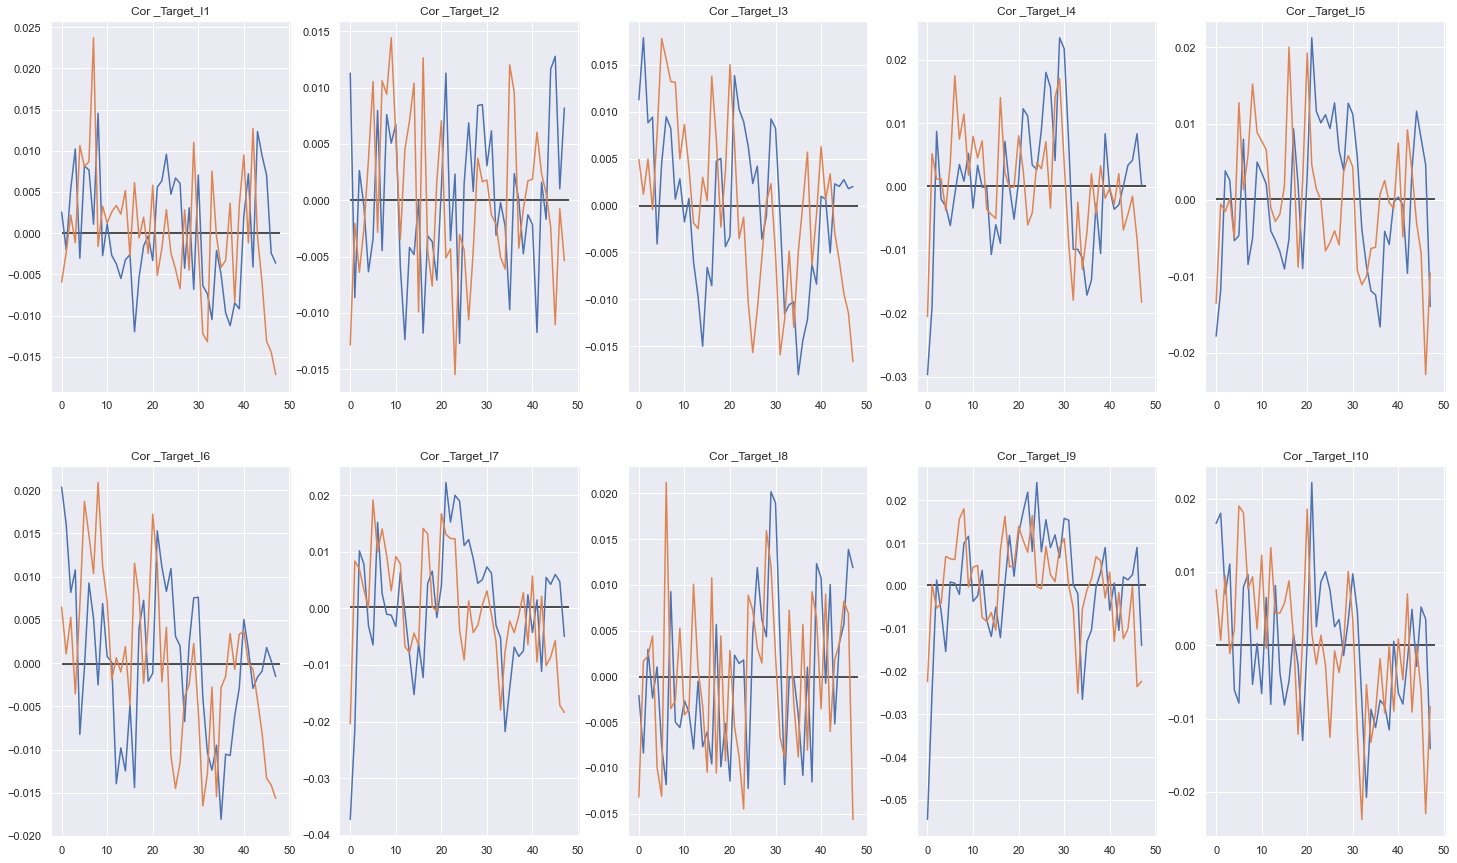

In [10]:
plt.figure(figsize=(25, 15))

for i in range(1,11):
    Cor0 = []
    Cor = []
    for j in range(48):
        Cor0.append(np.corrcoef(di['I'+str(i)+'_lag'+ str(j)], di['X1'], rowvar= False)[0,1])
        Cor.append(np.corrcoef(di['I'+str(i)+'_lag'+ str(j)], Target, rowvar= False)[0,1])
    ### plot
    plt.subplot(2, 5, i)
    plt.title('Cor ' + '_Target_' + 'I'+str(i))
    plt.plot(Cor0);
    plt.plot(Cor)
    plt.hlines(np.mean(Cor0), 0, len(Cor0))
plt.show()

A partir des observations, on décide de jeter certains features en fonction des graphes ci-dessus. On a basé notre choix sur la position des corrélations à t=47. En effet, à moins qu'il y ait une une information qui chamboule le marché sur la dernière heure, les corrélations devraient être plus ou moins proches ou au moins de même signe. (on a réalisé plusieurs tests et le choix réalisé semble être optimal)

In [5]:
dic = {}
for i in [1, 7,4,6,5, 10, 9]:
    for j in range(48):
        dic['I'+str(i)+'_lag'+str(j)] = di['I'+str(i)+'_lag'+str(j)]
di1 = pd.DataFrame(dic)

In [6]:
dic = {}
for i in [1, 7,4,6,5, 10, 9]:
    for j in range(48):
        dic['I'+str(i)+'_lag'+str(j)] = dt['I'+str(i)+'_lag'+str(j)]
dt1 = pd.DataFrame(dic)

### Moving Average

Il est classique lorsqu'on manipule des données temporelles d'utiliser une moyenne mobile afin de lisser les données.

In [7]:
dic = {}
for i in [1, 7, 4,6,5, 10, 9]:
    for j in range(41):
        features = []
        for hour in range(j,j+8):
            features.append('I'+str(i)+'_lag'+str(hour))
        dic['MVG' +str(i)+'_lag'+str(j)] = di[features].mean(axis=1)
technical_features = pd.DataFrame(dic)

In [8]:
dic = {}
for i in [1,4 ,7,6,5, 10, 9]:
    for j in range(41):
        features = []
        for hour in range(j,j+8):
            features.append('I'+str(i)+'_lag'+str(hour))
        dic['MVG' +str(i)+'_lag'+str(j)] = dt[features].mean(axis=1)
technical_features1 = pd.DataFrame(dic)

In [9]:
technical_features['X1'] = di['X1']
technical_features['X2'] = di['X2']
technical_features['X3'] = di['X3']
technical_features['X4'] = di['X4']
technical_features['X5'] = di['X5']

In [10]:
technical_features1['X1'] = dt['X1']
technical_features1['X2'] = dt['X2']
technical_features1['X3'] = dt['X3']
technical_features1['X4'] = dt['X4']
technical_features1['X5'] = dt['X5']

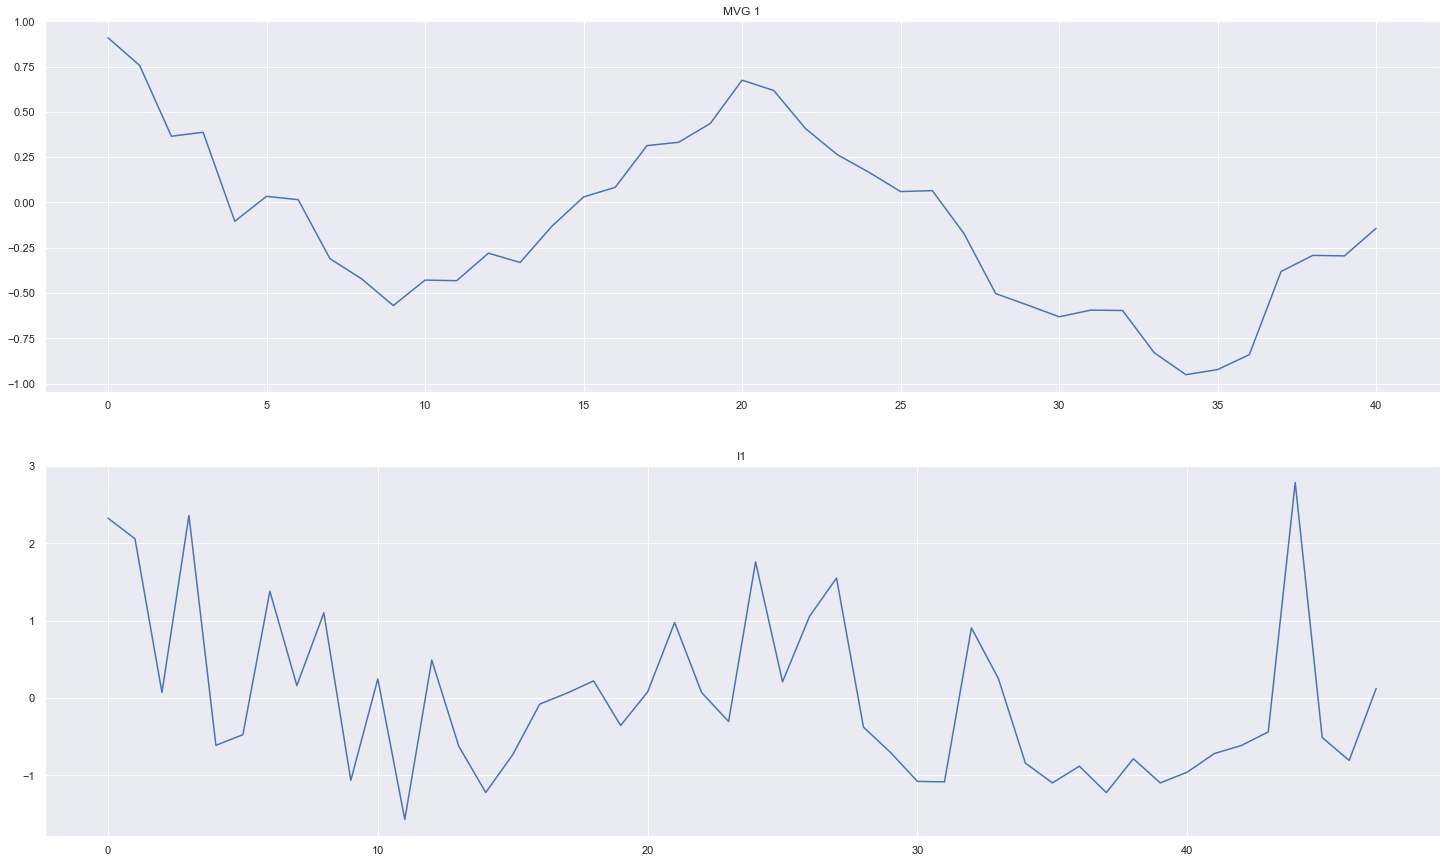

In [69]:
plt.figure(figsize=(25, 15))

MVG = []
I = []
for j in range(48):
    I.append(di['I'+str(1)+'_lag'+str(j)][0])
for j in range(41):
    MVG.append(technical_features['MVG'+str(1)+'_lag'+str(j)][0])
### plot
plt.subplot(2, 1, 1)
plt.title('MVG '+str(1))
plt.plot(MVG);
plt.subplot(2, 1, 2)
plt.title('I'+str(1))
plt.plot(I)
plt.show()

In [18]:
technical_features.head()

,MVG1_lag0,MVG1_lag1,MVG1_lag2,MVG1_lag3,MVG1_lag4,MVG1_lag5,MVG1_lag6,MVG1_lag7,MVG1_lag8,MVG1_lag9,...,MVG9_lag38,MVG9_lag39,MVG9_lag40,MVG9_lag41,MVG9_lag42,X1,X2,X3,X4,X5
0,0.955368,0.797774,0.481225,0.652911,0.082099,0.225245,0.042529,-0.105849,-0.236318,-0.623513,...,-0.119824,0.009314,0.119047,0.091437,0.100641,0.460020,0.620360,-0.972192,2.745197,4.177783
1,-2.410428,-1.884168,-1.253870,-1.371752,-1.531986,-0.716740,-0.118727,0.409840,0.554198,1.582330,...,-0.521994,-1.328194,-0.039626,0.280908,0.789364,-0.347872,-2.199925,-0.222026,3.741888,8.608291
2,-0.767266,-0.740118,-0.769607,-0.852282,-0.969595,-0.938095,-0.945680,-0.962966,-0.911601,-0.719054,...,1.260791,1.161020,0.844849,0.531657,0.379179,-2.152963,-0.432461,1.619057,-0.003912,3.870262
3,0.024057,-0.338630,-0.976214,-1.109595,-1.485142,-1.618615,-1.869693,-1.788815,-1.669727,-1.888837,...,0.573189,1.399432,1.748125,1.488002,1.943985,-1.827669,-1.881770,-4.214322,0.178225,0.992362
4,-1.208914,-1.185131,-0.815483,-0.665037,-0.613021,-0.774806,-0.852245,-0.853224,-0.996173,-0.956319,...,-0.380849,-0.237924,-0.807523,-1.001093,-0.721057,0.748761,1.799939,1.561006,5.204120,2.161637


### Feature Selection

On a utilisé un algorithme basé sur les forêts aléatoires pour connaître les importances des arbres. Les résultats avec ce choix de sélection n'étaient pas optimaux.

In [19]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
X=technical_features.to_numpy()
y=Target
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 301 (0.005172)
2. feature 302 (0.004542)
3. feature 303 (0.004089)
4. feature 304 (0.004031)
5. feature 305 (0.003843)
6. feature 288 (0.003816)
7. feature 258 (0.003767)
8. feature 287 (0.003694)
9. feature 261 (0.003690)
10. feature 259 (0.003655)
11. feature 298 (0.003633)
12. feature 262 (0.003616)
13. feature 260 (0.003608)
14. feature 286 (0.003602)
15. feature 218 (0.003597)
16. feature 281 (0.003596)
17. feature 284 (0.003583)
18. feature 277 (0.003578)
19. feature 299 (0.003576)
20. feature 276 (0.003565)
21. feature 263 (0.003561)
22. feature 282 (0.003559)
23. feature 285 (0.003558)
24. feature 264 (0.003551)
25. feature 245 (0.003550)
26. feature 289 (0.003549)
27. feature 244 (0.003548)
28. feature 72 (0.003541)
29. feature 255 (0.003532)
30. feature 290 (0.003528)
31. feature 49 (0.003528)
32. feature 118 (0.003516)
33. feature 296 (0.003512)
34. feature 274 (0.003512)
35. feature 50 (0.003507)
36. feature 273 (0.003494)
37. feature 272 (0.0034

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Recursive Feature elimination

L'objectif de cette algorithme est de sélectionner les features en considérant récursivement des ensembles de features de plus en plus petits. Premièrement, l'estimateur est entrainé sur l'ensemble initial de features et une importance est attribuée à chaque feature. Ensuite, le feature "le moins important" est supprimé de l'ensemble et on répète la procédure sur le nouveau set. On continue jusqu'à obtenir le nombre désiré de features.

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(technical_features)
rfe_selector = RFE(estimator=LogisticRegression(max_iter = 100000), n_features_to_select=230, step=10, verbose=10)
rfe_selector.fit(X_norm, Target)
rfe_support = rfe_selector.get_support()
rfe_feature = technical_features.iloc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 292 features.
Fitting estimator with 282 features.
Fitting estimator with 272 features.
Fitting estimator with 262 features.
Fitting estimator with 252 features.
Fitting estimator with 242 features.
Fitting estimator with 232 features.
230 selected features


In [35]:
rfe_feature = technical_features.loc[:,rfe_support].columns.tolist()

#### Corrélation de Pearson

On regarde la corrélation de Pearson entre la Target et les différents features dans notre échantillon d'apprentissage. On garde les n meilleurs features selon ce critère.
On a principalement utilisé ce critère pour nos analyses car il a un temps computationnel avantageux et il permet d'avoir de bons scores.

In [18]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(technical_features, Target,200)
print(str(len(cor_feature)), 'selected features')

200 selected features


#### SVM-Anova

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.pipeline import Pipeline

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)
sklearn.preprocessing.MinMaxScaler().fit_transform(technical_features)


clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('svc', SVC(gamma="auto", probability=True))])

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, 
                                  sklearn.preprocessing.MinMaxScaler().fit_transform(technical_features), 
                                  Target,
                                 scoring = make_scorer(log_loss, needs_proba = True, greater_is_better=False),
                                  verbose = 10,
                                 n_jobs = -1)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())
    
plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy Score')
plt.axis('tight')
plt.show()

#### Analyse en composantes principales

0.9563983137100832


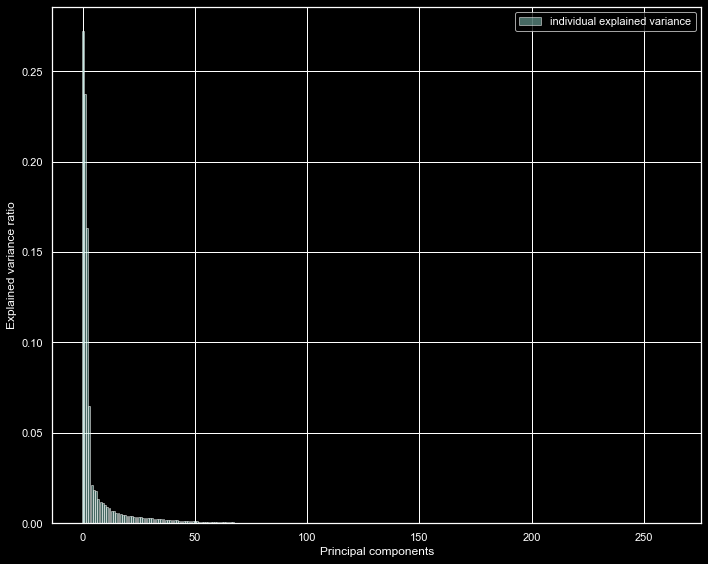

In [33]:
from sklearn.decomposition import PCA


scaler=StandardScaler()
pca = PCA()
pca.fit_transform(scaler.fit_transform(technical_features.to_numpy()))
explained_variance=pca.explained_variance_ratio_
print(np.sum(explained_variance[:40]))
with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 8))

    plt.bar(range(263), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [34]:
pca=PCA(n_components=40)
X_pca = pca.fit_transform(scaler.fit_transform(technical_features.to_numpy()))
X_test = pca.transform(scaler.transform(technical_features1.to_numpy()))

# Model

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, log_loss
my_kfold = KFold(n_splits=5, random_state=0,shuffle=True)

## Random Forest

In [ ]:
tree_range = np.arange(200, 500, 50)
max_depth = [10]
maxnodes = [100,150,200]
max_features = [28]

tuned_parameters = {'n_estimators' : tree_range, 'max_depth' : max_depth, 'max_leaf_nodes' : maxnodes, 'max_features' : max_features}

Cart_grid = GridSearchCV(RandomForestClassifier(),
                      tuned_parameters,
                      cv = my_kfold,
                      n_jobs = -1,
                      return_train_score=True,
                      scoring = make_scorer(log_loss, needs_proba = True, greater_is_better=False),
                      verbose = 10)

Cart_grid.fit(technical_features[cor_feature],Target1)

In [101]:
Cart_grid.best_score_

-1.0620748896306282

In [71]:
RF = RandomForestClassifier(max_features = 27, max_depth=9, max_leaf_nodes=100, n_estimators = 300)
RF.fit(technical_features[cor_feature], Target)

RandomForestClassifier(max_depth=9, max_features=27, max_leaf_nodes=100,
                       n_estimators=300)

In [ ]:
pd.DataFrame(RF.predict(technical_features1[cor_feature])).to_csv('RF_9_27_100_300.csv')

## Machine à vecteurs de support

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

param_grid = {'C': [0.7,0.75,0.8,1,2,3,5,10],  
              'gamma': [0.1,0.015,0.017,0.02,0.023,0.025,0.3,1], 
              'kernel': ['rbf']} 

Cart_grid1 = GridSearchCV(SVC(probability=True, decision_function_shape='ovo'),
                      param_grid,
                      cv = my_kfold,
                      n_jobs = -1,
                      return_train_score=True,
                      scoring = make_scorer(log_loss, needs_proba = True, greater_is_better=False),
                      verbose = 10)

Cart_grid1.fit(scaler.fit_transform(technical_features[cor_feature]),Target)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 49.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 60.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 89.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 110.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 139.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 161.0min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 199.8min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 230.7min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 270.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 303.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 351.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 392.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | el

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(decision_function_shape='ovo', probability=True),
             n_jobs=-1,
             param_grid={'C': [0.7, 0.75, 0.8, 1, 2, 3, 5, 10],
                         'gamma': [0.1, 0.015, 0.017, 0.02, 0.023, 0.025, 0.3,
                                   1],
                         'kernel': ['rbf']},
             return_train_score=True,
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=10)

In [57]:
Cart_grid1.best_params_

{'C': 0.75, 'gamma': 0.015, 'kernel': 'rbf'}

In [55]:
pd.DataFrame(Cart_grid1.predict_proba(scaler.transform(technical_features1[cor_feature]))).to_csv('SVM_075_0015_rbf.csv')

In [51]:
scaler = StandardScaler()
print(np.mean(cross_val_score(SVC(decision_function_shape='ovo', C=0.77, gamma=0.02, kernel = 'rbf', probability=True), 
                    scoring = make_scorer(log_loss, needs_proba = True, greater_is_better=False),
                    cv = my_kfold,
                    n_jobs = -1,
                   X = scaler.fit_transform(technical_features[rfe_feature]),
                   y = Target,
                   verbose=10)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 10.3min remaining: 15.5min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 10.4min remaining:  6.9min


-1.0438777408488267


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 15.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 15.0min finished


In [58]:
clf = SVC(decision_function_shape='ovo', C=0.7, gamma=0.02, kernel = 'rbf', probability=True)
clf.fit(X = scaler.fit_transform(technical_features), y = Target)

SVC(C=0.7, decision_function_shape='ovo', gamma=0.02, probability=True)

In [59]:
pd.DataFrame(clf.predict_proba(scaler.transform(technical_features1))).to_csv('SVC_07_ovo_002.csv')

## Gradient boosting

In [90]:
from xgboost import XGBClassifier

In [61]:
my_kfold = KFold(n_splits=5, random_state=0,shuffle=True)

tree_range = np.arange(600, 1000, 100)
learning_rate = [0.01]
max_depth = [4, 6, 8, 10]
colsample_bytree = [0.5, 0.6, 0.8, 0.9, 1]


tuned_parameters = {'n_estimators' : tree_range, 'learning_rate' : learning_rate, 'max_depth' : max_depth}

Cart_grid2 = GridSearchCV(XGBClassifier(),
                      tuned_parameters,
                      cv = my_kfold,
                      n_jobs = -1,
                      return_train_score=True,
                      scoring = make_scorer(log_loss, needs_proba = True, greater_is_better=False),
                      verbose = 10)

Cart_grid2.fit(technical_features[cor_feature],Target)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 61.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 84.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 117.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 156.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 219.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monot...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
             

In [63]:
Cart_grid2.best_score_

-1.0451388206971544

In [68]:
pd.DataFrame(Cart_grid2.predict_proba(technical_features1[cor_feature])).to_csv('XGBost1.csv')

## K-plus proches voisins

In [151]:
from sklearn.neighbors import KNeighborsClassifier


tuned_parameters = {'n_neighbors': range(75,120)}

nnGrid = GridSearchCV(KNeighborsClassifier(),
                      tuned_parameters,
                      cv = my_kfold,
                     n_jobs = -1,
                     verbose=10,
                     scoring = make_scorer(log_loss, needs_proba = True, greater_is_better=False))
nnGrid.fit(technical_features[cor_feature], Target)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(75, 120)},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=10)

In [152]:
nnGrid.best_score_

-1.0699826361696956

In [31]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

Cart_grid3 = GridSearchCV(model,
                      param_grid,
                      cv = my_kfold,
                      n_jobs = -1,
                      return_train_score=True,
                      scoring = make_scorer(log_loss, needs_proba = True, greater_is_better=False),
                      verbose = 10)

Cart_grid3.fit(technical_features[cor_feature],Target)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 13

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'max_depth': [15, 20, 25],
                         'min_split_gain': [0.3, 0.4],
                         'n_estimators': [400, 700, 1000],
                         'subsample': [0.7, 0.8, 0.9], 'subsample_freq': [20]},
             return_train_score=True,
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True),
             verbose=10)

In [33]:
Cart_grid3.best_score_

-1.0745027712167892

## Feed Forward Neural Network avec Keras

In [80]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation
N = technical_features.shape[1] # dimension en entrée
hidden_size = 512   # dimension de la couche cachée
num_classes = 3  # nombre de classes en sortie (autant que de chiffres ici)

# create model
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    # create model
    model = Sequential()
    model.add(Dense(hidden_size, input_dim=N, kernel_initializer=init, activation='relu'))
    model.add(Dense(hidden_size, kernel_initializer=init, activation='relu'))
    model.add(Dense(num_classes, kernel_initializer=init, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

# grid search epochs, batch size and optimizer

optimizers = ['rmsprop', 'adam', 'adag', 'sgd']
init = ['glorot_uniform']
epochs = [50, 100, 150]
batches = [10, 20, 30]

scaler = StandardScaler()

param_gridn = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_gridn ,n_jobs = -1, verbose = 10)
grid_result = grid.fit(scaler.fit_transform(technical_features), to_categorical(Target))

In [66]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model = Sequential()
model.add(Dense(60, input_shape=(200,), activation= "relu"))
model.add(Dense(30, activation= "tanh"))
model.add(Dense(3, activation= "softmax"))
model.summary()

sgd = SGD(lr=0.075)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
scaler = StandardScaler()

model.fit(technical_features[cor_feature],
                    to_categorical(Target), 
                    epochs=100, 
                    batch_size=32, 
                    validation_split=0.2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 60)                12060     
_________________________________________________________________
dense_17 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_18 (Dense)             (None, 3)                 93        
Total params: 13,983
Trainable params: 13,983
Non-trainable params: 0
_________________________________________________________________
Train on 11200 samples, validate on 2800 samples
Epoch 1/100
11200/11200 [==============================] - 2s 201us/step - loss: 1.0974 - accuracy: 0.3921 - val_loss: 1.0813 - val_accuracy: 0.4161
Epoch 2/100
11200/11200 [==============================] - 1s 130us/step - loss: 1.0505 - accuracy: 0.4389 - val_loss: 1.0557 - val_accuracy: 0.4293
Epoch 3/100
11200/11200 [========

In [ ]:
model.evaluate(x_val,to_categorical(y_val))

In [ ]:
pd.DataFrame(model.predict_proba(technical_features1[cor_feature])).to_csv('CNNbrouillon.csv')